In [1]:
# Libraries
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from waveome import (
    model_classes,
    kernels,
    model_search,
    likelihoods
)

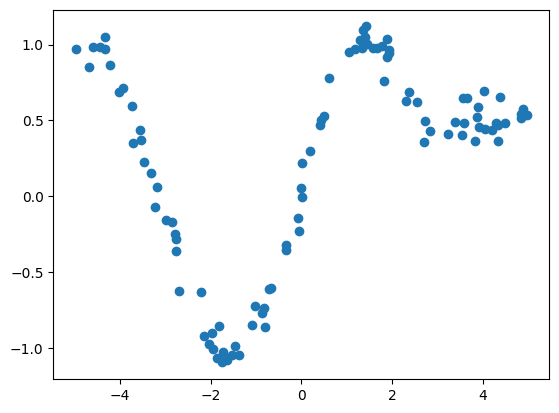

In [2]:
# Simulate some data
np.random.seed(9102)
N = 100
# X = np.concatenate(
#     [
#         np.random.choice(a=np.arange(3), size=(N, 1), replace=True),
#         np.random.uniform(low=-5, high=5, size=(N, 1))
#     ],
#     axis=1
# )
X = np.random.uniform(low=-5, high=5, size=(N, 1))

# Prediction points for later
num_pred_points = 1000
xnew = np.linspace(-5, 5, num_pred_points).reshape(-1, 1)

# Outcome is sin with unit specific offset
# Y = (np.sin(X[:, 1] + X[:, 0]) + X[:, 0] + np.random.normal(scale=.1, size=N)).reshape(-1, 1)
Y = np.sin(X)
Y[X >= 3] = 0.5
Y += np.random.normal(scale=.1, size=(N, 1))

# Plot the functions for each unit
# for unit in np.unique(X[:, 0]):
#     plt.scatter(X[X[:, 0] == unit, 1], Y[X[:, 0] == unit], label=f'Unit {int(unit)}')
# plt.legend()
plt.scatter(X, Y)
plt.show()

In [3]:
# Make base class
gp = model_classes.BaseGP(
    X=X,
    Y=Y,
    # kernel=(
    #     kernels.Categorical(active_dims=[0])
    #     * gpflow.kernels.SquaredExponential(active_dims=[1])
    #     + gpflow.kernels.SquaredExponential(active_dims=[1])
    # ),
    kernel=gpflow.kernels.SquaredExponential(),
    verbose=True
)
print(gpflow.utilities.print_summary(gp))

╒════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═══════════════╤═════════╤══════════════════╕
│ name                       │ class     │ transform        │ prior   │ trainable   │ shape         │ dtype   │ value            │
╞════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═══════════════╪═════════╪══════════════════╡
│ BaseGP.mean_function.c     │ Parameter │ Identity         │         │ True        │ (1,)          │ float64 │ [0.]             │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼──────────────────┤
│ BaseGP.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()            │ float64 │ 1.0              │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼──────────────────┤
│ BaseGP.kernel.lengthscales │ Parameter │ Softplus         │         │ True       

In [4]:
# Randomize initial values and then optimize hyperparameters
gp.randomize_params(random_seed=9102)
gp.optimize_params()
gp

Round 0 training loss: 545.505874544965
Round 100 training loss: 254.5954010064654
Round 200 training loss: 235.86440536539135
Round 300 training loss: 224.14664373777174
Round 400 training loss: 213.69209295266734
Round 500 training loss: 203.3473232766284
Round 600 training loss: 192.8492911179286
Round 700 training loss: 182.19194868514646
Round 800 training loss: 171.61336273282208
Round 900 training loss: 161.3314989096428
Round 1000 training loss: 151.47810910156556
Round 1100 training loss: 142.11271751670841
Round 1200 training loss: 133.25163790458882
Round 1300 training loss: 124.89008367864156
Round 1400 training loss: 117.01415244467356
Round 1500 training loss: 109.60597993981256
Round 1600 training loss: 102.64554134104932
Round 1700 training loss: 96.11122397485416
Round 1800 training loss: 89.9801488896793
Round 1900 training loss: 84.22856160573346
Optimization converged - stopping early (round 1980)


name,class,transform,prior,trainable,shape,dtype,value
BaseGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.45238]
BaseGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.12669
BaseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.37855
BaseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.04965
BaseGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
BaseGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[7.93360e-01...
BaseGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[5.69210e-01, 0.00000e+00, 0.00000e+00..."


In [5]:
# Show that we can do this process a number of times to search parameter space easier
gp.random_restart_optimize(num_restart=3)

Random restart 1
Round 0 training loss: 334.0510369926808


Optimization converged - stopping early (round 80)
Found better parameters!
Random restart 2
Round 0 training loss: 233.9092731627407


Optimization converged - stopping early (round 50)
Found better parameters!
Random restart 3
Round 0 training loss: 390.38361260675816
Round 100 training loss: 75.33492526902556
Optimization converged - stopping early (round 100)
Found better parameters!


In [6]:
gp

name,class,transform,prior,trainable,shape,dtype,value
BaseGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.42748]
BaseGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.12822
BaseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.3585
BaseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.04035
BaseGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
BaseGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[7.83660e-01...
BaseGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[5.44970e-01, 0.00000e+00, 0.00000e+00..."


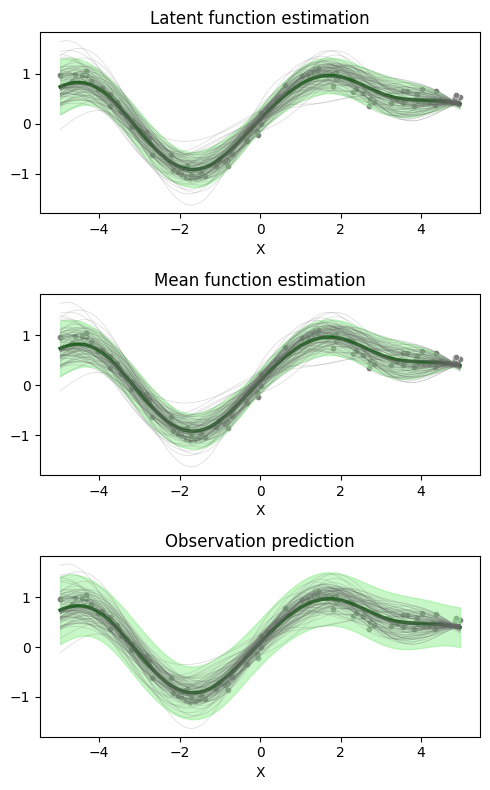

In [7]:
# Now plot the resulting model predictions
figs, axs = plt.subplots(3, 1, figsize=(5, 8))
# for i in range(3):
#     gp.plot_functions(x_idx=1, col_names=['X'], predict_type='func', ax=axs[0], unit_idx=0, unit_label=i, plot_points=False)
#     gp.plot_functions(x_idx=1, col_names=['X'], predict_type='mean', ax=axs[1], unit_idx=0, unit_label=i, plot_points=False)
#     gp.plot_functions(x_idx=1, col_names=['X'], predict_type='obs', ax=axs[2], unit_idx=0, unit_label=i, plot_points=False)
gp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
gp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
gp.plot_functions(x_idx=0, col_names=['X'], predict_type='obs', ax=axs[2])
axs[2].set_title('Observation prediction')
figs.tight_layout()
plt.show()

In [8]:
gp.kernel_name

'squared_exponential'

In [9]:
print(f"Variance explained for each component: {gp.variance_explained()}")
print(f"BIC: {gp.calc_metric()}")

Variance explained for each component: None
BIC: 158.66985053805112


## Nonnormal data

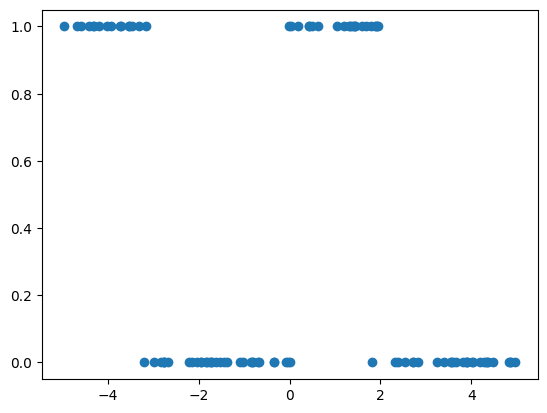

In [10]:
np.random.seed(9102)
import scipy
Y_binomial = np.random.binomial(n=1, p=scipy.special.expit(Y))
# for unit in np.unique(X[:, 0]):
    # plt.scatter(X[X[:, 0] == unit, 1], Y_binomial[X[:, 0] == unit], label=f'Unit {int(unit)}')
plt.scatter(X, Y_binomial)
# plt.legend()
plt.show()

In [11]:
logistic_gp = model_classes.VarGP(
    X=X,
    Y=Y_binomial,
    kernel=gpflow.kernels.SquaredExponential(),
    likelihood='bernoulli'
)

In [12]:
logistic_gp.optimize_params()
logistic_gp

name,class,transform,prior,trainable,shape,dtype,value
VarGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.30718]
VarGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.01209
VarGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.94982
VarGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
VarGP.q_mu,Parameter,Identity,Normal,False,"(100, 1)",float64,[[4.952e-02...
VarGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 100, 100)",float64,"[[[9.9222e-01, 0.0000e+00, 0.0000e+00..."


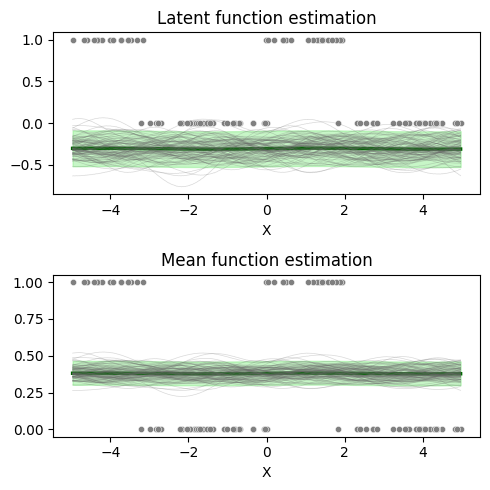

In [13]:
# Now plot the resulting model predictions
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
logistic_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')

logistic_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')

# This throws an error 
# logistic_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='obs', ax=axs[2])
# axs[2].set_title('Observation prediction')

figs.tight_layout()
plt.show()

# figs, axs = plt.subplots(3, 1, figsize=(5, 5))
# for i in range(3):
#     logistic_gp.plot_functions(x_idx=1, col_names=['X'], predict_type='func', ax=axs[0], unit_idx=0, unit_label=i, plot_points=False)
#     logistic_gp.plot_functions(x_idx=1, col_names=['X'], predict_type='mean', ax=axs[1], unit_idx=0, unit_label=i, plot_points=False)
#     logistic_gp.plot_functions(x_idx=1, col_names=['X'], predict_type='obs', ax=axs[2], unit_idx=0, unit_label=i, plot_points=False)
# plt.show()

## Zero Inflated Negative Binomial

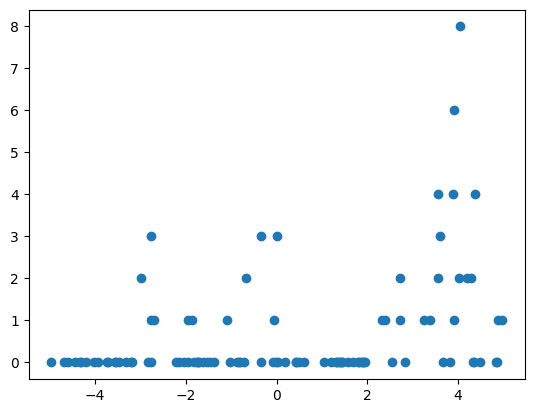

In [14]:

zinb = likelihoods.ZeroInflatedNegativeBinomial()

def zinb_sample(zinb, X, Y):
    m = zinb.invlink(Y) #* zinb.scale
    r = 1. / zinb.alpha
    np.random.seed(9102)
    obs_flag = np.random.binomial(n=1, p=(1.0 - (m/ (zinb.km + m))))
    intensity_val = np.random.negative_binomial(
        n=r, 
        p=(r / (m + r))
    )
    return obs_flag * intensity_val

# Y_zinb = zinb._conditional_mean(X, Y).numpy()
# Y_zinb = likelihoods.ZeroInflatedNegativeBinomial().invlink(Y).numpy()
Y_zinb = zinb_sample(zinb, X, Y).astype(float)
plt.scatter(X, Y_zinb)

In [15]:
zinb_gp = model_classes.VarGP(
    X=X,
    Y=Y_zinb,
    kernel=gpflow.kernels.SquaredExponential(),
    likelihood='zeroinflated_negativebinomial'
)
zinb_gp.optimize_params()

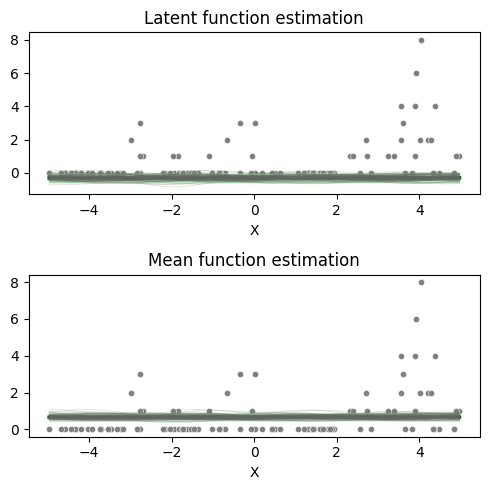

In [16]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
zinb_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
zinb_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

## Inducing points

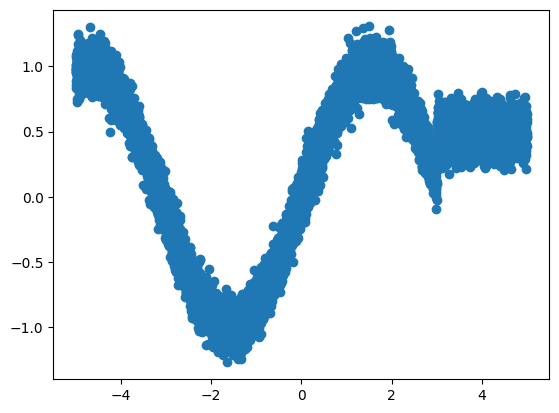

In [17]:
# Simulate some data
np.random.seed(9102)
X_big = np.random.uniform(low=-5, high=5, size=(100*N, 1))
Y_big = np.sin(X_big)
Y_big[X_big >= 3] = 0.5
Y_big += np.random.normal(scale=.1, size=(100*N, 1))
plt.scatter(X_big, Y_big)

In [18]:
sgp = model_classes.SparseGP(
    X=X_big,
    Y=Y_big,
    kernel=gpflow.kernels.SquaredExponential(),
    num_inducing_points=10,
    random_seed=9102
)
sgp

name,class,transform,prior,trainable,shape,dtype,value
SparseGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.42748]
SparseGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
SparseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
SparseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0
SparseGP.inducing_variable.Z,Parameter,Identity,,True,"(10, 1)",float64,[[-2.57471...
SparseGP.q_mu,Parameter,Identity,,True,"(10, 1)",float64,[[0....
SparseGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 10, 10)",float64,"[[[1., 0., 0...."


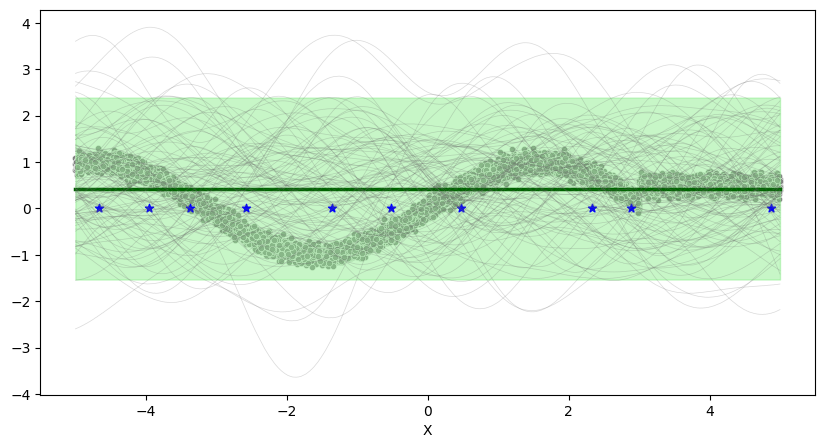

In [19]:
# Plot original points with inducing points
sgp.plot_functions(x_idx=0, col_names=['X'])
plt.scatter(
    sgp.inducing_variable.Z, 
    np.zeros_like(sgp.inducing_variable.Z), 
    color='blue', 
    marker='*'
)

In [20]:
sgp

name,class,transform,prior,trainable,shape,dtype,value
SparseGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.42748]
SparseGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
SparseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
SparseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0
SparseGP.inducing_variable.Z,Parameter,Identity,,True,"(10, 1)",float64,[[-2.57471...
SparseGP.q_mu,Parameter,Identity,,True,"(10, 1)",float64,[[0....
SparseGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 10, 10)",float64,"[[[1., 0., 0...."


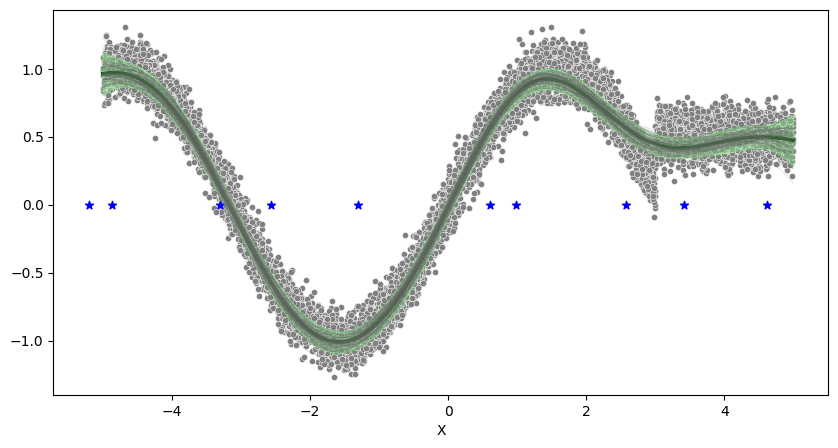

In [21]:
# Now optimize parameters (inclduing inducing points) and plot results
sgp.optimize_params()
sgp.plot_functions(x_idx=0, col_names=['X'])
plt.scatter(
    sgp.inducing_variable.Z, 
    np.zeros_like(sgp.inducing_variable.Z), 
    color='blue', 
    marker='*'
)

## Penalized GP

In [22]:
pgp = model_classes.PenalizedGP(
    X=X,
    Y=Y,
    penalization_factor=10.
)

In [23]:
pgp.optimize_params()
pgp

name,class,transform,prior,trainable,shape,dtype,value
PenalizedGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.21648]
PenalizedGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,0.00516
PenalizedGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.26852
PenalizedGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.46505
PenalizedGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
PenalizedGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[2.0600e-03...
PenalizedGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[9.8451e-01, 0.0000e+00, 0.0000e+00..."


In [24]:
# Search over penalization factors
pgp.penalization_search()

Penalization search:   0%|          | 0/15 [00:00<?, ?it/s]

Penalization search:  73%|███████▎  | 11/15 [00:42<00:12,  3.20s/it]

Optimization not converged after 5000 rounds


Penalization search:  80%|████████  | 12/15 [00:43<00:07,  2.35s/it]

Optimization not converged after 5000 rounds


Penalization search: 100%|██████████| 15/15 [00:54<00:00,  3.61s/it]


In [25]:
print(f'GP new penalization factor: {pgp.penalization_factor}')
pgp

GP new penalization factor: 1.0


name,class,transform,prior,trainable,shape,dtype,value
PenalizedGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.24876]
PenalizedGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,0.23378
PenalizedGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.25177
PenalizedGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.09533
PenalizedGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
PenalizedGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[5.80770e-01...
PenalizedGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[5.4849e-01, 0.0000e+00, 0.0000e+00..."


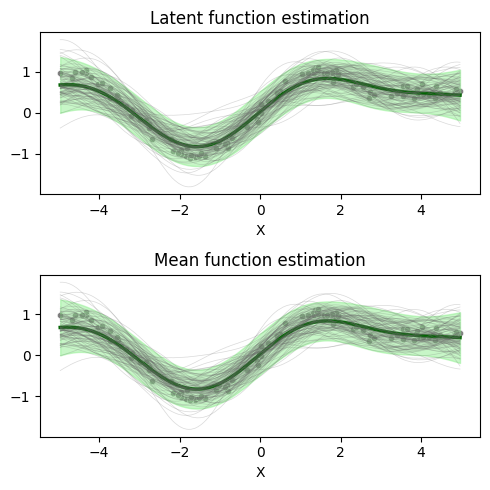

In [26]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
pgp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
pgp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

## Putting it all together

In [27]:
Y_zinb_big = zinb_sample(zinb, X_big, Y_big).astype(float)
psvgp = model_classes.PSVGP(
    X=X_big,
    Y=Y_zinb_big,
    penalized_options={'penalization_factor': 10.},
    sparse_options={'num_inducing_points': 100},
    variational_options={'likelihood': 'zeroinflated_negativebinomial'}
)
psvgp

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.29469]
PSVGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,1.0
PSVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.0
PSVGP.likelihood.km,Parameter,Softplus,,True,(),float64,1.0
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[-4.75419...
PSVGP.q_mu,Parameter,Identity,Normal,True,"(100, 1)",float64,[[0....
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,True,"(1, 100, 100)",float64,"[[[1., 0., 0...."


In [28]:
psvgp.optimize_params(num_opt_iter=100)
psvgp

Optimization not converged after 100 rounds


name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.16571]
PSVGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,0.43124
PSVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.29994
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.11241
PSVGP.likelihood.km,Parameter,Softplus,,True,(),float64,0.44708
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[-4.85564...
PSVGP.q_mu,Parameter,Identity,Normal,False,"(100, 1)",float64,[[-1.33081e+00...
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 100, 100)",float64,"[[[7.5973e-01, 0.0000e+00, 0.0000e+00..."


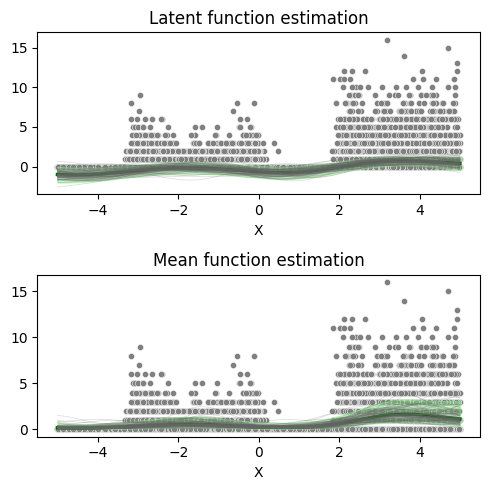

In [29]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
psvgp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
psvgp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

## GP Search Class

In [30]:
# zinb = likelihoods.ZeroInflatedNegativeBinomial()

# def zinb_sample(zinb, X, Y):
#     m = zinb.invlink(Y) #* zinb.scale
#     r = 1. / zinb.alpha
#     np.random.seed(9102)
#     obs_flag = np.random.binomial(n=1, p=(1.0 - (m/ (zinb.km + m))))
#     intensity_val = np.random.negative_binomial(
#         n=r, 
#         p=(r / (m + r))
#     )
#     return obs_flag * intensity_val

# # Y_zinb = zinb._conditional_mean(X, Y).numpy()
# # Y_zinb = likelihoods.ZeroInflatedNegativeBinomial().invlink(Y).numpy()
# Y_zinb = zinb_sample(zinb, X, Y).astype(float)

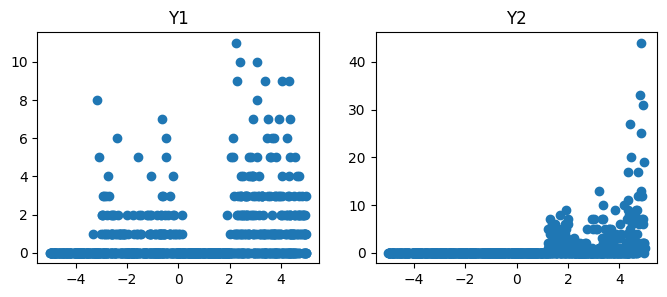

In [31]:
pd_X = pd.DataFrame(
    data=X_big[:1000, :],
    columns=['X']
)
pd_Y = pd.DataFrame(
    data=Y_zinb_big[:1000, :],
    columns=['Y1']
)
pd_Y['Y2'] = zinb_sample(zinb, pd_X['X'], pd_Y['Y1'] + 0.001*pd_X['X'] + 0.5).astype(float)

figs, axs = plt.subplots(1, 2, figsize=(8,3))
axs[0].scatter(pd_X, pd_Y['Y1'])
axs[0].set_title('Y1')
axs[1].scatter(pd_X, pd_Y['Y2'])
axs[1].set_title('Y2')

gps = model_search.GPSearch(
    X=pd_X,
    Y=pd_Y,
    outcome_likelihood='zeroinflated_negativebinomial',
)

In [32]:
gps.run_penalized_search(
    num_jobs=6,
    kernel_options={'kerns': [gpflow.kernels.SquaredExponential(), gpflow.kernels.Matern12()]},
    sparse_options={'num_inducing_points': 100},
    optimization_options={'num_opt_iter': 500},
    search_options={'random_seed': 9102}
)

GPSearch:   0%|          | 0/30 [00:00<?, ?it/s]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:   3%|▎         | 1/30 [02:59<1:26:39, 179.28s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:   7%|▋         | 2/30 [03:00<34:47, 74.57s/it]   WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:  13%|█▎        | 4/30 [03:01<10:48, 24.93s/it]

Optimization not converged after 500 rounds


GPSearch:  17%|█▋        | 5/30 [03:02<06:44, 16.17s/it]

Optimization not converged after 500 rounds


GPSearch:  20%|██        | 6/30 [03:03<04:21, 10.90s/it]

Optimization not converged after 500 rounds


Optimization not converged after 500 rounds


GPSearch:  23%|██▎       | 7/30 [05:58<24:45, 64.59s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:  30%|███       | 9/30 [06:01<10:50, 30.97s/it]

Optimization not converged after 500 rounds
Optimization not converged after 500 rounds


GPSearch:  33%|███▎      | 10/30 [06:01<07:09, 21.46s/it]

Optimization not converged after 500 rounds


GPSearch:  40%|████      | 12/30 [06:04<03:20, 11.14s/it]

Optimization not converged after 500 rounds


GPSearch:  43%|████▎     | 13/30 [07:43<10:42, 37.82s/it]

Optimization not converged after 500 rounds


GPSearch:  47%|████▋     | 14/30 [07:45<07:09, 26.86s/it]

Optimization not converged after 500 rounds
Optimization not converged after 500 rounds


GPSearch:  50%|█████     | 15/30 [07:45<04:42, 18.81s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:  53%|█████▎    | 16/30 [10:44<15:36, 66.88s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:  60%|██████    | 18/30 [10:45<06:36, 33.05s/it]

Optimization not converged after 500 rounds


GPSearch:  63%|██████▎   | 19/30 [10:45<04:15, 23.23s/it]

Optimization not converged after 500 rounds


GPSearch:  67%|██████▋   | 20/30 [10:45<02:43, 16.36s/it]

Optimization not converged after 500 rounds


Optimization not converged after 500 rounds


GPSearch:  70%|███████   | 21/30 [11:05<02:36, 17.41s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds
Optimization not converged after 500 rounds


GPSearch:  80%|████████  | 24/30 [13:43<02:55, 29.25s/it]

Optimization not converged after 500 rounds


GPSearch:  83%|████████▎ | 25/30 [13:45<01:44, 20.86s/it]

Optimization not converged after 500 rounds


GPSearch:  87%|████████▋ | 26/30 [13:45<00:58, 14.69s/it]

Optimization not converged after 500 rounds


GPSearch:  90%|█████████ | 27/30 [14:03<00:46, 15.58s/it]

Optimization not converged after 500 rounds


GPSearch:  93%|█████████▎| 28/30 [15:30<01:14, 37.25s/it]

Optimization not converged after 500 rounds


GPSearch:  97%|█████████▋| 29/30 [15:31<00:26, 26.36s/it]

Optimization not converged after 500 rounds


GPSearch: 100%|██████████| 30/30 [15:32<00:00, 18.51s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch: 100%|██████████| 30/30 [15:34<00:00, 31.16s/it]


In [33]:
gps.models['Y1']

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-1.38784]
PSVGP.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.17176
PSVGP.kernel.kernels[0].lengthscales,Parameter,Softplus,,True,(),float64,0.21755
PSVGP.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.11486
PSVGP.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,0.3093
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.07442
PSVGP.likelihood.km,Parameter,Softplus,,True,(),float64,0.03484
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[-3.09270e-01...
PSVGP.q_mu,Parameter,Identity,Normal,False,"(100, 1)",float64,[[0.71751...
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 100, 100)",float64,"[[[9.0204e-01, 0.0000e+00, 0.0000e+00..."


In [34]:
gps.models['Y2']

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-1.38784]
PSVGP.kernel.kernels[0].variance,Parameter,Softplus,Exponential,True,(),float64,0.35877
PSVGP.kernel.kernels[0].lengthscales,Parameter,Softplus,,True,(),float64,0.93993
PSVGP.kernel.kernels[1].variance,Parameter,Softplus,Exponential,True,(),float64,0.27007
PSVGP.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,0.62343
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.445
PSVGP.likelihood.km,Parameter,Softplus,,True,(),float64,0.02075
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[2.03272...
PSVGP.q_mu,Parameter,Identity,Normal,False,"(100, 1)",float64,[[1.67174...
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 100, 100)",float64,"[[[9.0042e-01, 0.0000e+00, 0.0000e+00..."


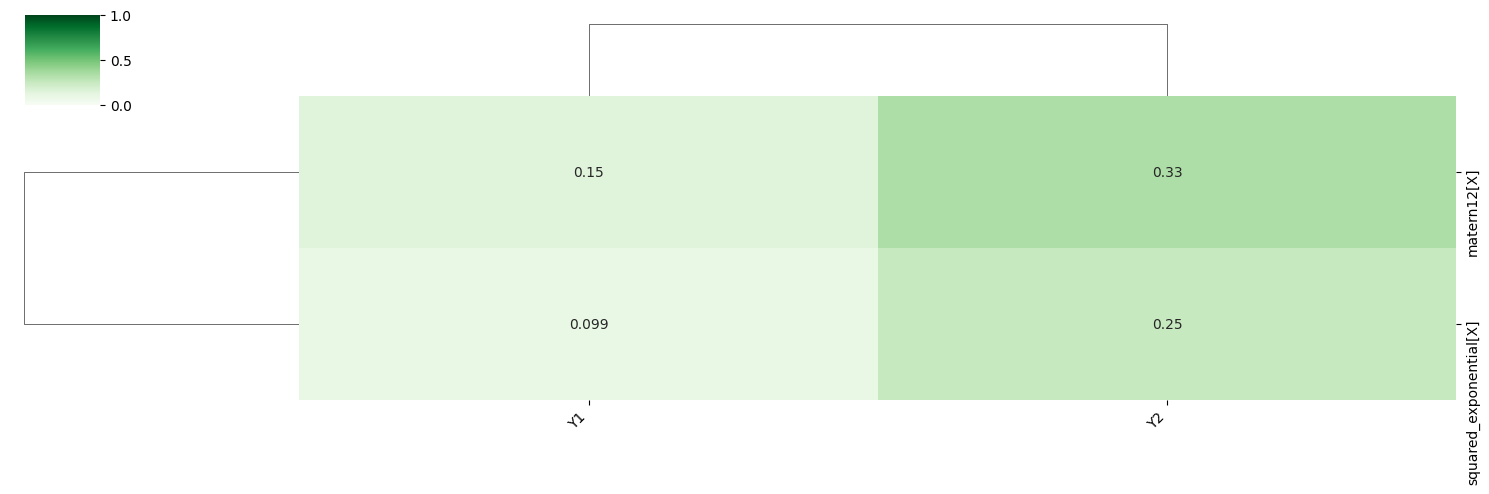

In [35]:
# Something still seems off here with the filtering of values
gps.plot_heatmap(var_cutoff=0)

(<Figure size 2000x500 with 3 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[X] (3.7%)'}, xlabel='X'>,
         <Axes: title={'center': 'matern12[X] (3.8%)'}, xlabel='X'>,
         <Axes: title={'center': 'residuals (92.5%)'}, xlabel='X'>,
         <Axes: >]], dtype=object))

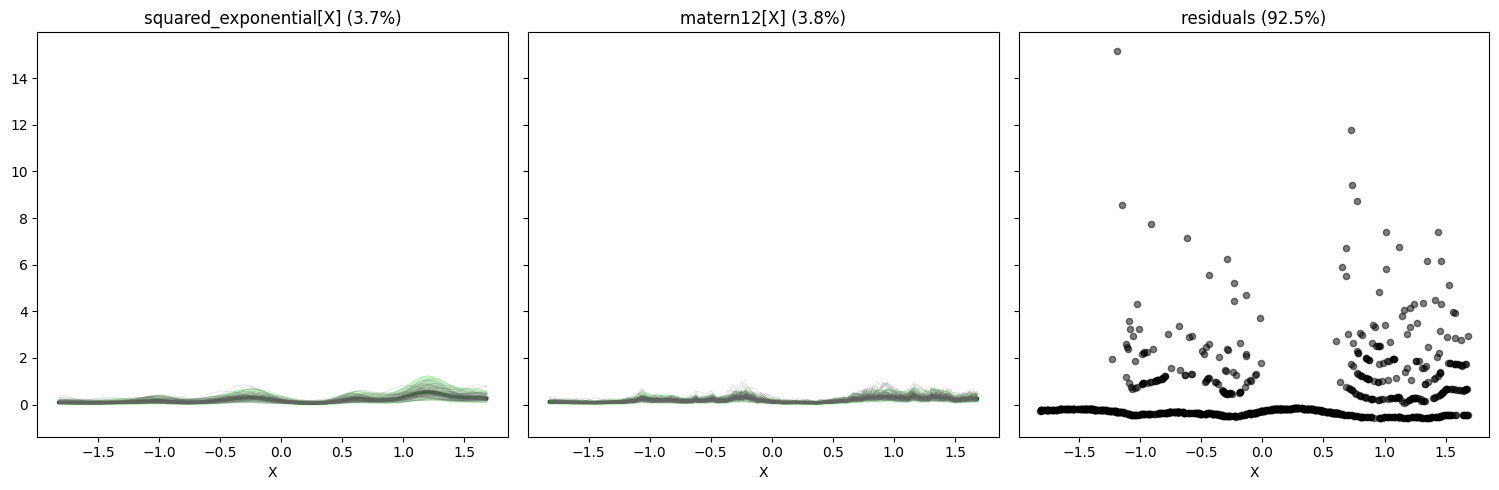

In [36]:
gps.plot_parts(out_label='Y1', x_axis_label='X')#, conf_level_val=0.1)
# plt.yscale('log')
# plt.ylim(-10, 100)

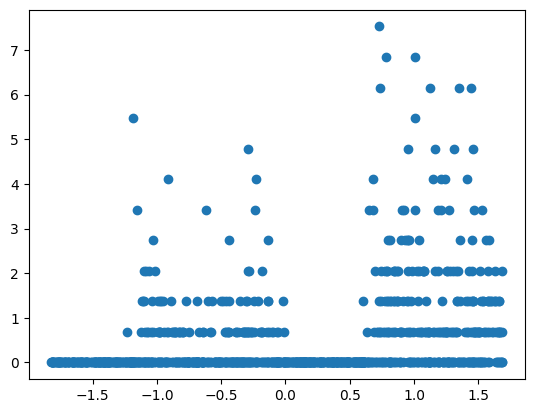

In [37]:
plt.scatter(gps.models['Y1'].X, gps.models['Y1'].Y)

(<Figure size 2000x500 with 3 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[X] (13.8%)'}, xlabel='X'>,
         <Axes: title={'center': 'matern12[X] (11.1%)'}, xlabel='X'>,
         <Axes: title={'center': 'residuals (75.1%)'}, xlabel='X'>,
         <Axes: >]], dtype=object))

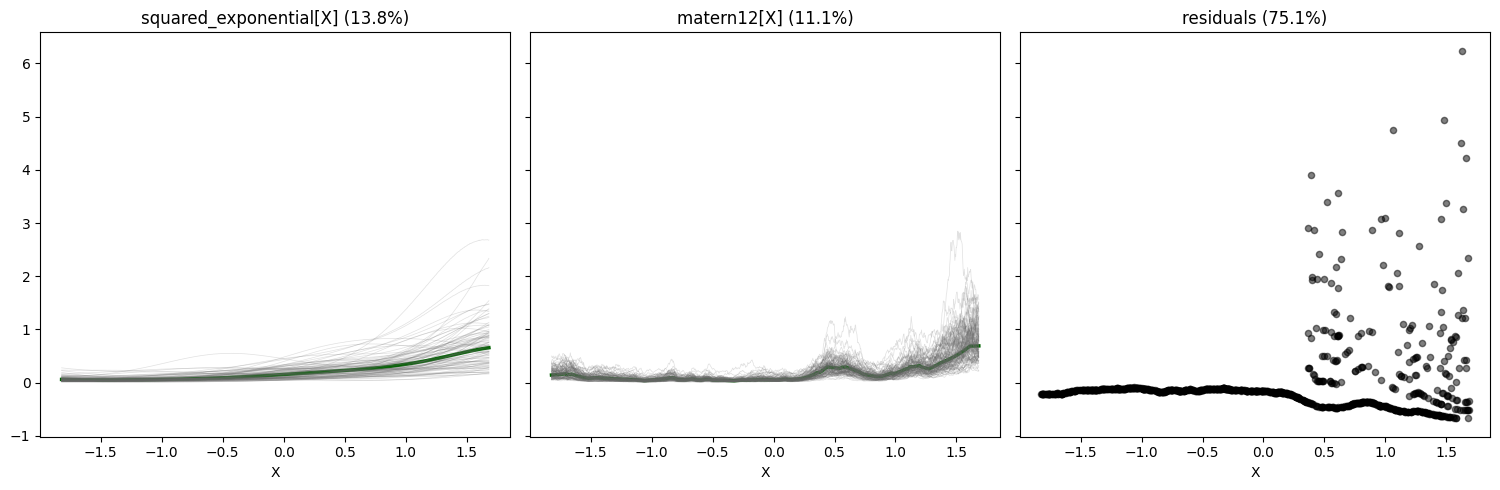

In [38]:
gps.plot_parts(out_label='Y2', x_axis_label='X', conf_level_val=0)
# plt.yscale('log')
# plt.ylim(-10, 100)

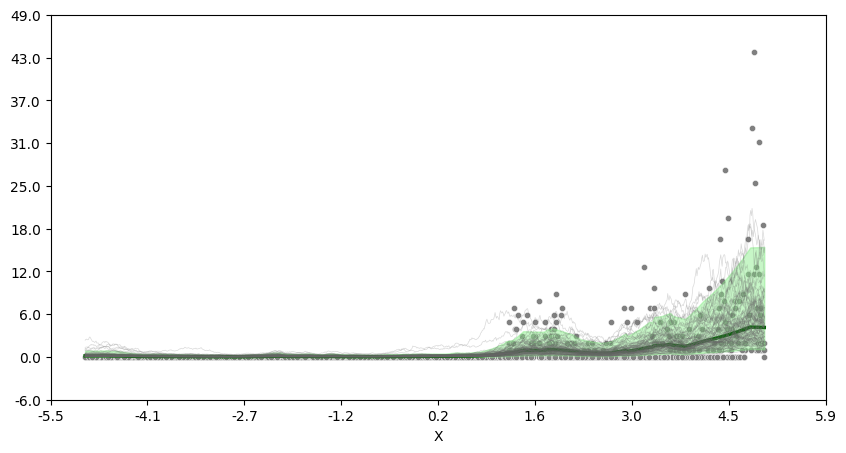

In [39]:
gps.plot_marginal(out_label="Y2", x_axis_label="X", reverse_transform_axes=True)
# # labels = [item.get_text()*gps.X_stds[0] for item in plt.get_xticklabels()]
# # plt.set_xticklabels(labels)

# # x_loc, x_labels = plt.xticks()
# # x_labels = [numeric(x) * gps.X_stds for x in x_labels]
# # plt.xticks(ticks=x_loc, labels=x_labels)
# plt.xticks(
#     ticks=plt.xticks()[0], 
#     labels=np.round(gps.X_stds[0]*np.array(plt.xticks()[0], dtype=np.float64) + gps.X_means[0], 1)
# )

# plt.yticks(
#     ticks=plt.yticks()[0],
#     labels=np.round(gps.Y_stds[0]*np.array(plt.yticks()[0], dtype=np.float64) + gps.Y_means[0], 1)
# )
plt.show()

## Account for multiple time-specific effects

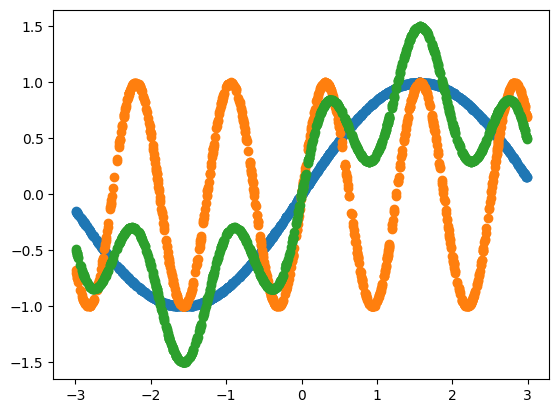

In [40]:
# Multiple time components with different lengthscales
# Libraries
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from waveome import (
    model_classes,
    kernels,
    model_search,
    likelihoods,
    utilities
)


np.random.seed(9102)
n = 1000
x_time = np.random.uniform(low=-3, high=3, size=n)
y_time = np.sin(x_time) 
y_time2 = np.sin(5*x_time)
y_time_out = y_time + 0.5*y_time2

plt.scatter(x_time, y_time)
plt.scatter(x_time, y_time2)
plt.scatter(x_time, y_time_out)

In [41]:
gps_time = model_search.GPSearch(
    X=pd.DataFrame({
        "time": x_time
    }),
    Y=pd.DataFrame({
        "y_mixed": y_time_out
    }),
    outcome_likelihood="gaussian",
)

gps_time.penalized_optimization(optimization_options={'num_opt_iter': 500})

GPOptimize (no search):   0%|          | 0/1 [00:32<?, ?it/s]


In [42]:
gps_time.models["y_mixed"]

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.72318]
PSVGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,0.13624
PSVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.33379
PSVGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.35037
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(500, 1)",float64,[[2.65057e+00...
PSVGP.q_mu,Parameter,Identity,Normal,False,"(500, 1)",float64,[[6.27530e-01...
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 500, 500)",float64,"[[[8.1435e-01, 0.0000e+00, 0.0000e+00..."


In [43]:
utilities.calc_rsquare(gps_time.models["y_mixed"])

[0.727, 0.273]

In [44]:
gps_time.models["y_mixed"].kernel

name,class,transform,prior,trainable,shape,dtype,value
SquaredExponential.variance,Parameter,Softplus,Exponential,True,(),float64,0.13624
SquaredExponential.lengthscales,Parameter,Softplus,,True,(),float64,0.33379


(<Figure size 2000x500 with 2 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[time] (72.7%)'}, xlabel='time'>,
         <Axes: title={'center': 'residuals (27.3%)'}, xlabel='time'>,
         <Axes: >, <Axes: >]], dtype=object))

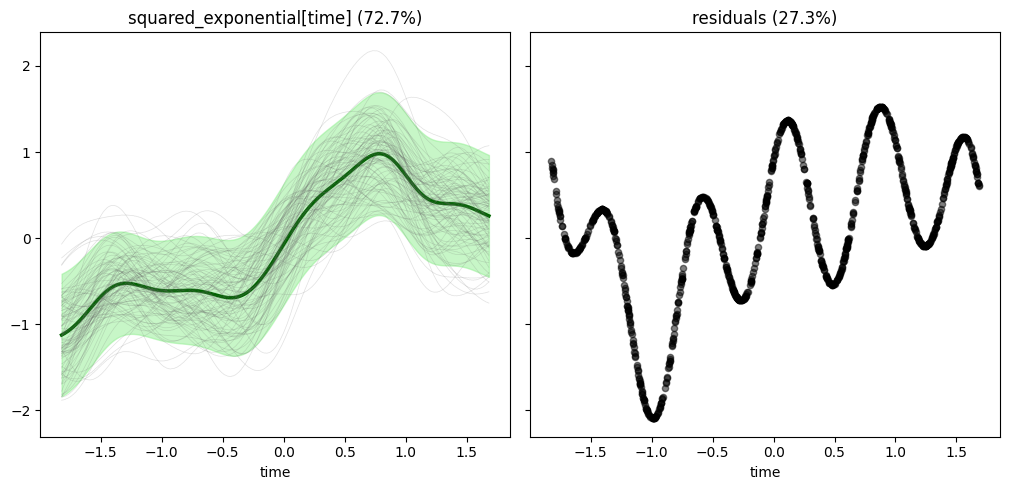

In [45]:
gps_time.plot_parts(out_label="y_mixed", x_axis_label="time")

In [46]:
# from waveome import utilities

# mu_, var_, fns_, covs_ = utilities.individual_kernel_predictions(
#     model=gps_time.models["y_mixed"],
#     kernel_idx=0,
#     X=gps_time.models["y_mixed"].X
# )

# plt.scatter(
#     gps_time.models["y_mixed"].X,
#     mu_
# )

<Axes: xlabel='time'>

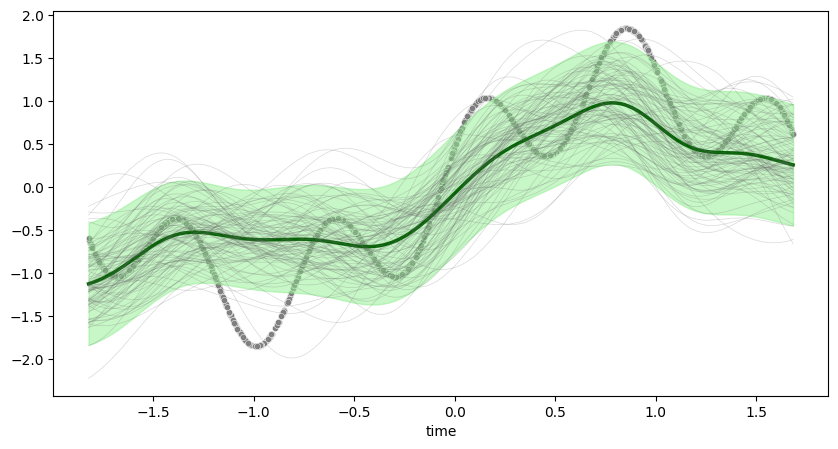

In [47]:
gps_time.plot_marginal(out_label="y_mixed", x_axis_label="time")

In [48]:
# Now add two time columns
gps_time2 = model_search.GPSearch(
    X=pd.DataFrame({
        "time1": x_time,
        "time2": x_time
    }),
    Y=pd.DataFrame({
        "y_mixed": y_time_out
    }),
    outcome_likelihood="gaussian"
)

gps_time2.penalized_optimization(
    random_seed=9102,
    num_random_restarts=5,
    kernel_options={
        "second_order_numeric": False,
        "kerns": [
            gpflow.kernels.SquaredExponential(), 
            gpflow.kernels.Periodic(base_kernel=gpflow.kernels.SquaredExponential())
        ]
    }
)

GPOptimize (no search):   0%|          | 0/1 [00:51<?, ?it/s]


(<Figure size 2000x1000 with 5 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[time1] (29.8%)'}, xlabel='time1'>,
         <Axes: title={'center': 'periodic[time1] (23.0%)'}, xlabel='time1'>,
         <Axes: title={'center': 'squared_exponential[time2] (22.0%)'}, xlabel='time2'>,
         <Axes: title={'center': 'periodic[time2] (24.6%)'}, xlabel='time2'>],
        [<Axes: title={'center': 'residuals (0.6%)'}, xlabel='time1'>,
         <Axes: >, <Axes: >, <Axes: >]], dtype=object))

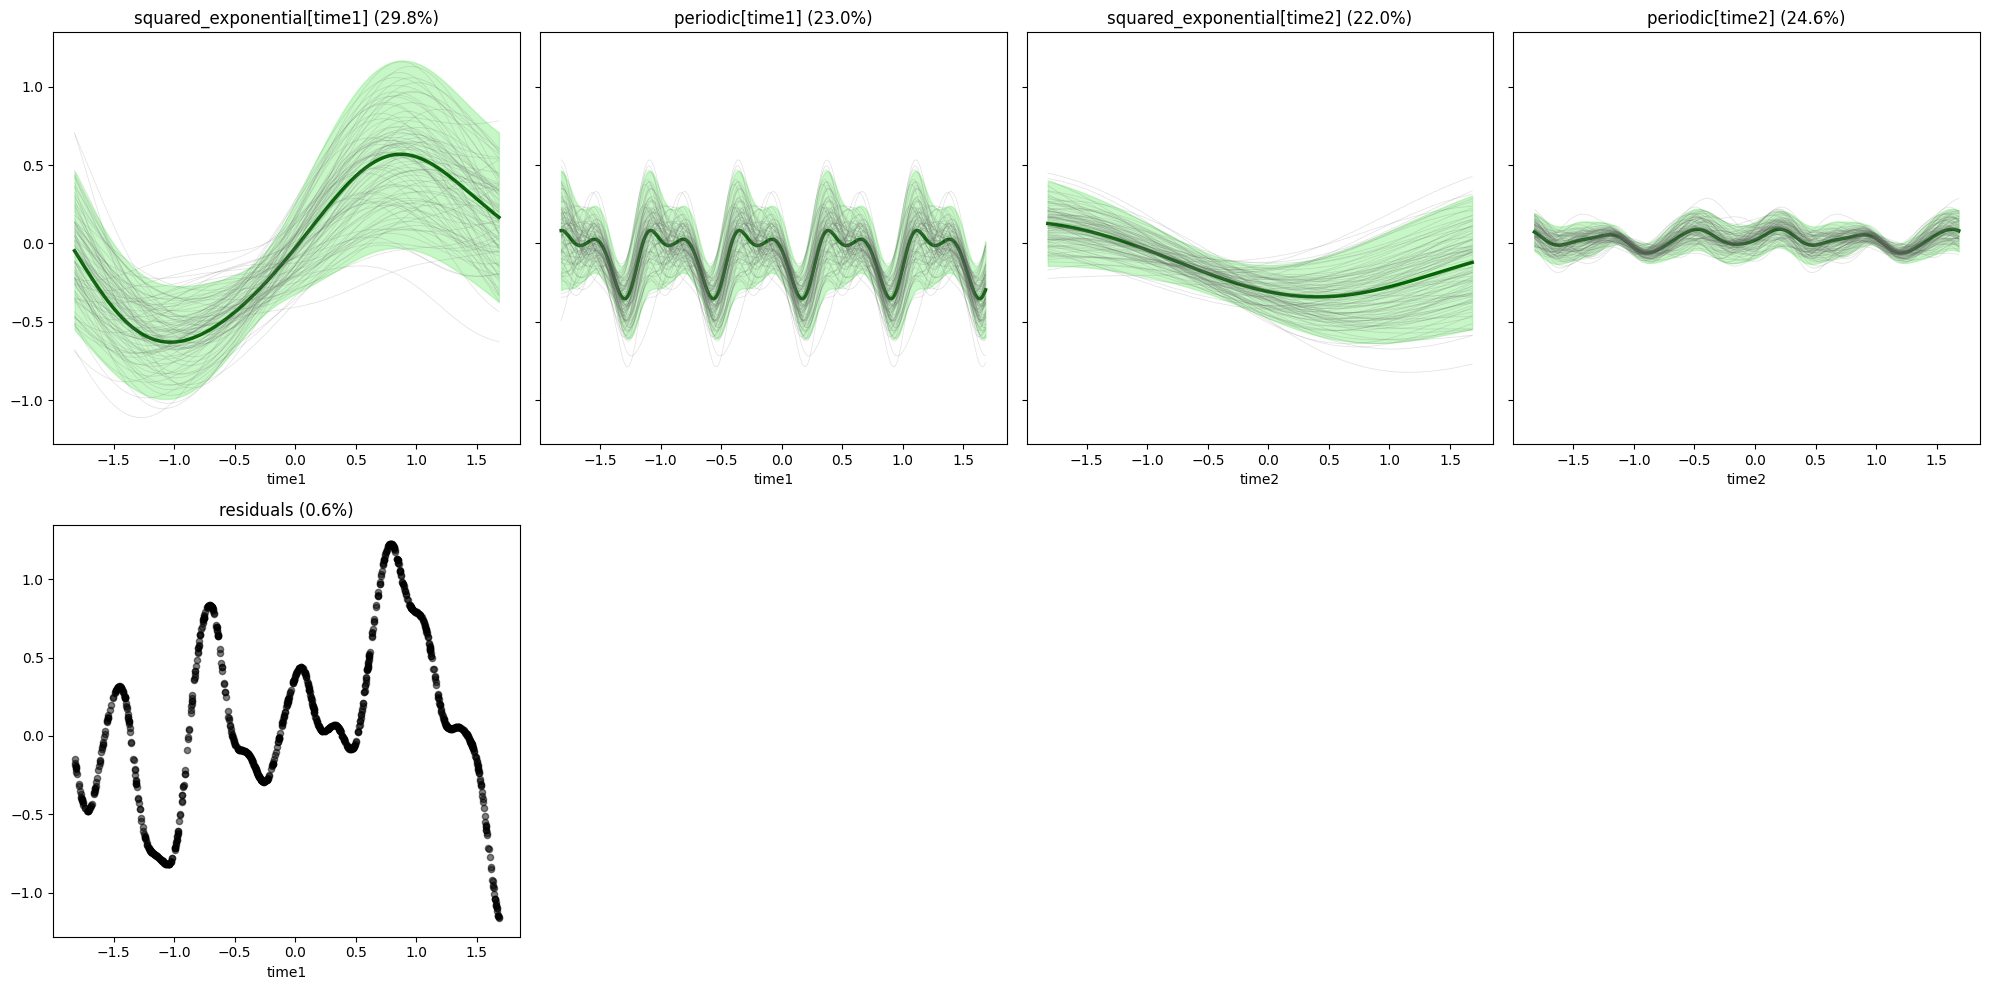

In [49]:
gps_time2.plot_parts(out_label="y_mixed", x_axis_label="time1")

<Axes: xlabel='time1'>

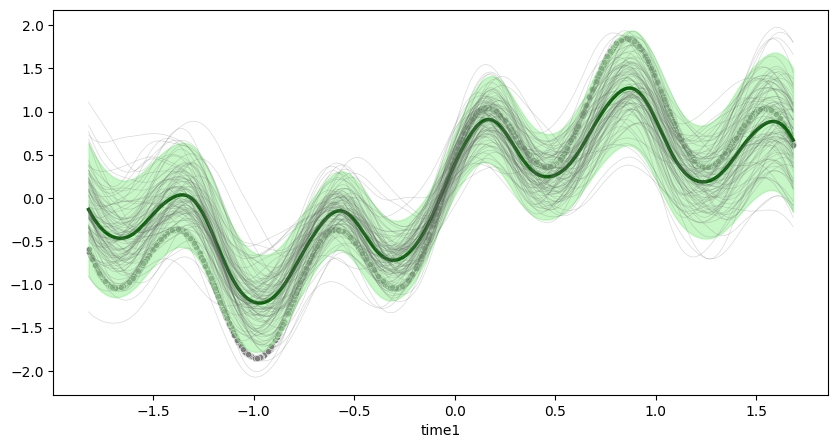

In [50]:
# Faster moving component
gps_time2.plot_marginal(out_label="y_mixed", x_axis_label="time1")

<Axes: xlabel='time2'>

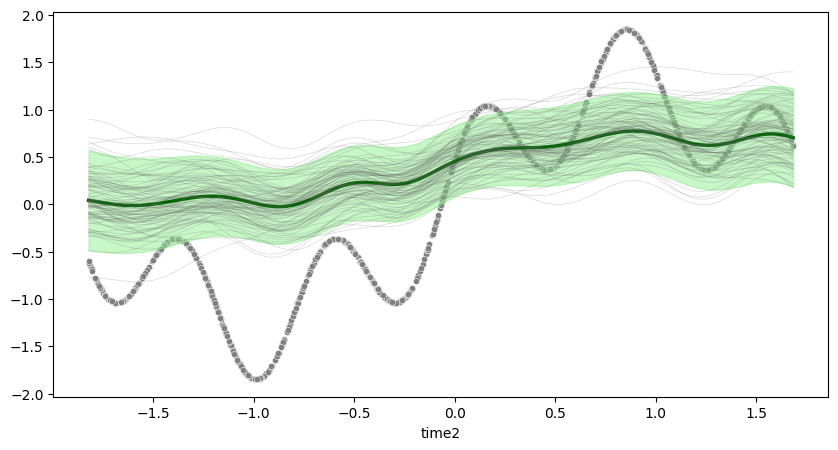

In [51]:
# Slower moving component
gps_time2.plot_marginal(out_label="y_mixed", x_axis_label="time2")